In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import multiprocessing
import time
import math

from IPython.display import clear_output
warnings.filterwarnings('ignore')

In [2]:
from src.sigsimulation import *
from src.robustper import robustper_wrap, mltproc_robustper_wrap
from src.baywatch import baywatch_wrap, mltproc_baywatch_wrap
from src.statsbased import stats_wrap, mltproc_stats_wrap
from src.upnsca import upnsca_wrap, mltproc_upnsca_wrap
from src.bcndetection import bcndetection_wrap, mltproc_bcndetection_wrap

## Play with Signal Simulation

----

- Just some code blocks to play with the simulated signals and visualize how periodic signals with various noises look like.
- When the noise ratio increases, time-series signals become more and more distorted.
- In real-world scenarios, strictly-periodic signals are extremely rare, suggesting the importance of building noise-robust algorithms.



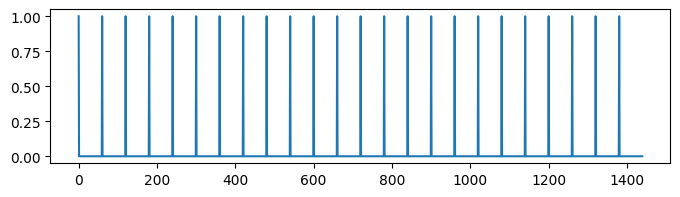

In [3]:
period_minutes = 60 # set this number to have signals with # minutes periodicity
period_insec = period_minutes * 60

# we first generate one strictly periodic signal (no noise at all) with periodicity = $period_insec
# the total length of the time-series is defined by length 
sig = gen_periodic_signal_insec(period_insec, std=0., omit_rate=0., length=24*60*60)

# resample the signal into per minutes
resig = resample_sig(sig)

fig = plt.figure(figsize=(8,2))
plt.plot(resig)

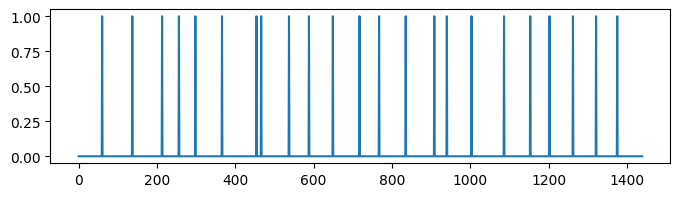

In [4]:
# set std to shift periodic events followed by a Gaussian distribution
# the noise randomly draw a value from the gaussian distribution and shift the original periodic events
# the larger the value, the more distorted the periodic signal
# Such distortion caused failure of periodicity algorithm
std_value = 0.2

sig = gen_periodic_signal_insec(period_insec, std=std_value, omit_rate=0., length=24*60*60)

# resample the signal into per minutes
resig = resample_sig(sig)

fig = plt.figure(figsize=(8,2))
plt.plot(resig)

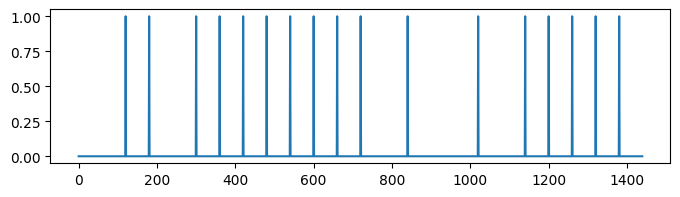

In [5]:
# set omit_rate to randomly drop the events
# when omit_rate = 0.2, each event has 20% probability being dropped
sig = gen_periodic_signal_insec(period_insec, std=0., omit_rate=0.2, length=24*60*60)

# resample the signal into per minutes
resig = resample_sig(sig)

fig = plt.figure(figsize=(8,2))
plt.plot(resig)

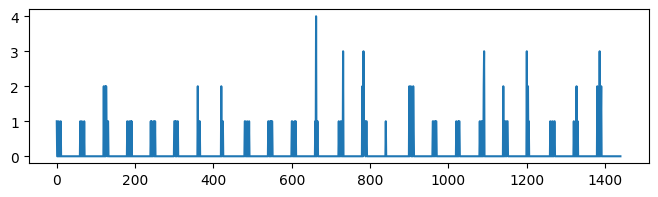

In [6]:
# set prate to insert poisson events around the periodic events
sig = add_poisson_insert(period_insec, prate=0.2, maxarrival=100, lam=5)
resig = resample_sig(sig)
fig = plt.figure(figsize=(8,2))
plt.plot(resig)